Trend Forecasting Using OLS.

Pending - optimal lengs of rolling window

In [3]:
# pip install yfinance -user

In [1]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
df=yf.download('EURUSD=X', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [6]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,1.122083,0
2020-01-02,1.121894,1.122712,1.116682,1.122083,1.122083,0
2020-01-03,1.117081,1.118068,1.112570,1.117144,1.117144,0
2020-01-06,1.116246,1.120825,1.115810,1.116196,1.116196,0
2020-01-07,1.119583,1.119946,1.113487,1.119799,1.119799,0
...,...,...,...,...,...,...
2024-03-04,1.084269,1.086649,1.083858,1.084269,1.084269,0
2024-03-05,1.085517,1.087536,1.084269,1.085517,1.085517,0
2024-03-06,1.085600,1.091405,1.084293,1.085600,1.085600,0


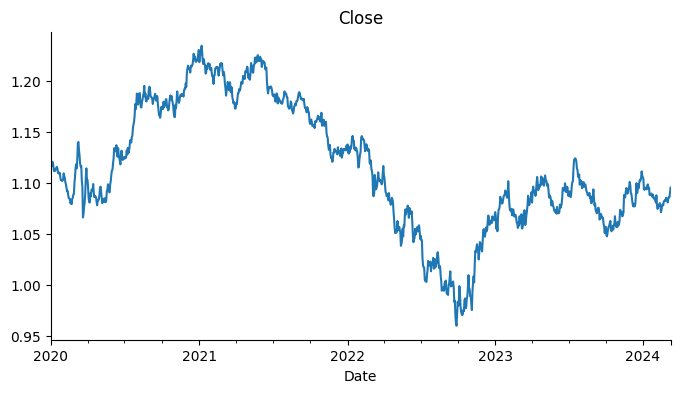

In [7]:
# @title Close

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
window =25
test_df=df[:window]

In [9]:
test_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,1.122083,1.122838,1.115947,1.122083,1.122083,0
2020-01-02,1.121894,1.122712,1.116682,1.122083,1.122083,0
2020-01-03,1.117081,1.118068,1.112570,1.117144,1.117144,0
2020-01-06,1.116246,1.120825,1.115810,1.116196,1.116196,0
2020-01-07,1.119583,1.119946,1.113487,1.119799,1.119799,0
2020-01-08,1.115573,1.116520,1.111086,1.115474,1.115474,0
2020-01-09,1.111444,1.112223,1.109509,1.111321,1.111321,0
2020-01-10,1.110926,1.112100,1.108623,1.111111,1.111111,0
2020-01-13,1.111655,1.114467,1.111408,1.111667,1.111667,0


In [10]:
Y_=test_df.Close #dependent var
X_=pd.Series(range(len(test_df.index))).values #independent var

In [11]:
model_=sm.OLS(Y_,sm.add_constant(X_)).fit()

In [ ]:
#model_.params
#print(model_.summary())

In [12]:
model_.predict()[-1]

1.1020549352352427

In [13]:
lsma_arr=[]
dates_arr=[]
for i in range(len(df)-24):
    input_reg=df[i:i+25]
    X=pd.Series(range(len(input_reg.index))).values
    Y=input_reg.Close
    model=sm.OLS(Y, sm.add_constant(X)).fit()
    pred=model.predict()[-1]
    lsma_arr.append(pred)
    dates_arr.append(input_reg.iloc[-1].name)


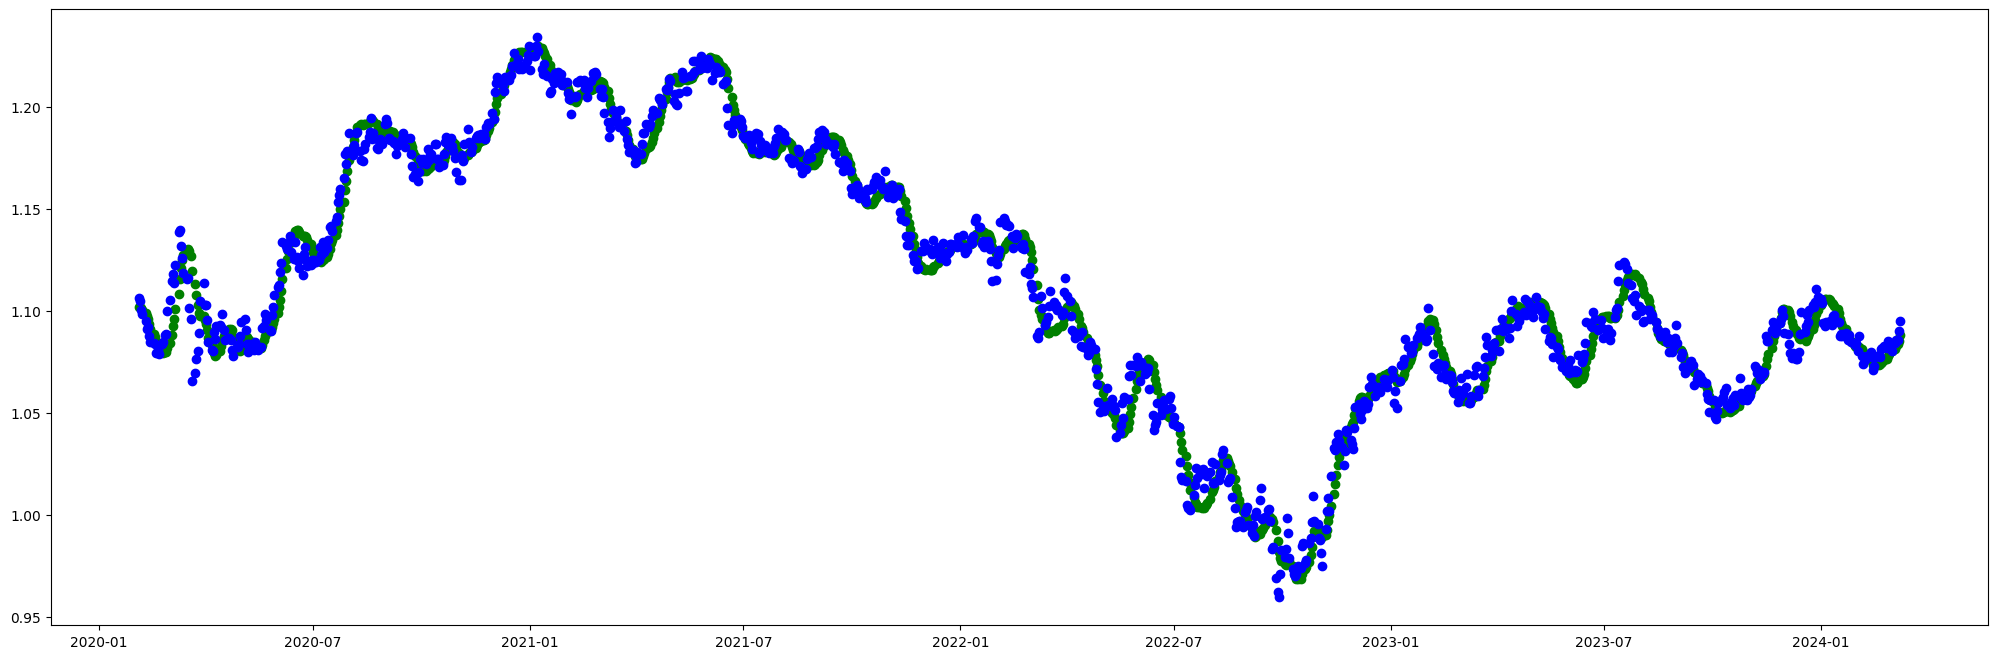

In [14]:
lsma_df=pd.DataFrame({'LSMA':lsma_arr}, index=dates_arr)
all_df=pd.concat([lsma_df,df],axis=1)
all_df.dropna(inplace=True)
#all_df
plt.figure(figsize=(25,8))
#plt.plot(all_df[['Open','LSMA']])
plt.scatter(all_df.index,all_df.LSMA,color='green')
plt.scatter(all_df.index,all_df.Close,color='blue')

,LSMA,Open,High,Low,Close,Adj Close,Volume
2020-02-04,1.102055,1.106293,1.106562,1.103387,1.106293,1.106293,0
2020-02-05,1.102020,1.104472,1.104850,1.099832,1.104728,1.104728,0
2020-02-06,1.101467,1.100049,1.101285,1.096551,1.100231,1.100231,0
2020-02-07,1.100429,1.098105,1.098699,1.094691,1.098298,1.098298,0
2020-02-10,1.098981,1.094871,1.096131,1.090960,1.094931,1.094931,0
...,...,...,...,...,...,...,...
2024-03-04,1.081525,1.084269,1.086649,1.083858,1.084269,1.084269,0
2024-03-05,1.082637,1.085517,1.087536,1.084269,1.085517,1.085517,0
2024-03-06,1.083813,1.085600,1.091405,1.084293,1.085600,1.085600,0
2024-03-07,1.085318,1.089954,1.094092,1.086933,1.089954,1.089954,0


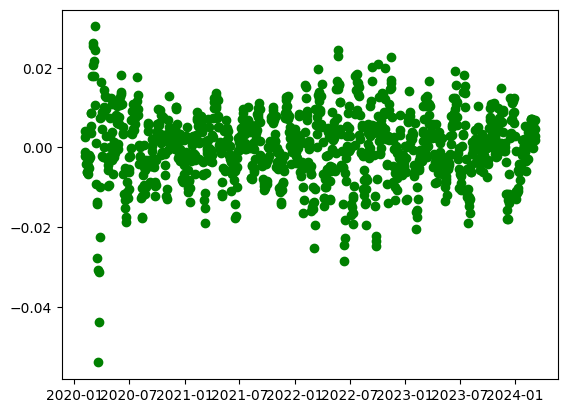

In [16]:
# enhancment
pred_err=(all_df["Close"]-all_df["LSMA"])
pred_err
plt.scatter(pred_err.index,pred_err,color='green')
all_df